In [1]:
'''
Decision Trees : Classification
Decision Tree algorithm is known by its modern name CART which stands for Classification and Regression Trees.
Decision Tree algorithm terminology:
1. Root Node: represents the entire sample
2. Splitting: process of dividing a node into two or more sub-nodes
3. Decision Node: sub-node spliting into further sub-nodes
4. Leaf/Terminal Node: Nodes that do not split 
5. Pruning: we remove sub-nodes of a decision node. It is the opposite process of splitting.
6. Branch/Sub-Tree: sub-section of an entire tree
7. Parent and Child Node: A node, which is divided into sub-nodes is called the parent node of sub-nodes 
                          where sub-nodes are the children of a parent 
Attribute selection measures:
1. Information gain:
   Entropy measures the impurity in the given dataset
   Information gain is the decrease in entropy
   Information gain is the difference between entropy before split and average entropy after split of the dataset 
2. Gini Index:
   used to create split points
'''

'\nDecision Trees : Classification\nDecision Tree algorithm is known by its modern name CART which stands for Classification and Regression Trees.\nDecision Tree algorithm terminology:\n1. Root Node: represents the entire sample\n2. Splitting: process of dividing a node into two or more sub-nodes\n3. Decision Node: sub-node spliting into further sub-nodes\n4. Leaf/Terminal Node: Nodes that do not split \n5. Pruning: we remove sub-nodes of a decision node. It is the opposite process of splitting.\n6. Branch/Sub-Tree: sub-section of an entire tree\n7. Parent and Child Node: A node, which is divided into sub-nodes is called the parent node of sub-nodes \n                          where sub-nodes are the children of a parent \nAttribute selection measures:\n1. Information gain:\n   Entropy measures the impurity in the given dataset\n   Information gain is the decrease in entropy\n   Information gain is the difference between entropy before split and average entropy after split of the datas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [3]:
data='/kaggle/input/car-evaluation-data-set/car_evaluation.csv'
df=pd.read_csv(data,header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
for col in col_names:
    print(f'Columns Name: {col}')
    print(df[col].value_counts())  
    print('================================')

Columns Name: buying
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Columns Name: maint
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Columns Name: doors
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
Columns Name: persons
persons
2       576
4       576
more    576
Name: count, dtype: int64
Columns Name: lug_boot
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
Columns Name: safety
safety
low     576
med     576
high    576
Name: count, dtype: int64
Columns Name: class
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [8]:
#target column
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [9]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [10]:
##feature Engineering: process of transforming raw data into useful features
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [11]:
le=LabelEncoder()
df['buying']=le.fit_transform(df['buying'])
df['maint']=le.fit_transform(df['maint'])
df['doors']=le.fit_transform(df['doors'])
df['persons']=le.fit_transform(df['persons'])
df['lug_boot']=le.fit_transform(df['lug_boot'])
df['safety']=le.fit_transform(df['safety'])
#df['class']=le.fit_transform(df['class'])

In [12]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc


In [13]:
#declare feature vector and target variable
x = df.drop(['class'], axis=1)
y = df['class']

In [14]:
#Split data into separate training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [15]:
x_train.shape, x_test.shape

((1157, 6), (571, 6))

In [16]:
x_train.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
dtype: object

In [17]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
y_pred_gini = clf_gini.predict(x_test)        
y_pred_gini

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
    

In [19]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7653


In [20]:
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array(['unacc', 'unacc', 'acc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [21]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7744


In [22]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.7744
Test set score: 0.7653


[Text(0.375, 0.875, 'x[3] <= 0.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\ngini = 0.573\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(0.25, 0.375, 'x[1] <= 2.5\ngini = 0.634\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(0.125, 0.125, 'gini = 0.619\nsamples = 194\nvalue = [108, 21, 25, 40]'),
 Text(0.375, 0.125, 'gini = 0.495\nsamples = 69\nvalue = [31, 0, 38, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\ngini = 0.425\nsamples = 519\nvalue = [116, 28, 375, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 257\nvalue = [0, 0, 257, 0]'),
 Text(0.875, 0.125, 'gini = 0.59\nsamples = 262\nvalue = [116, 28, 118, 0]')]

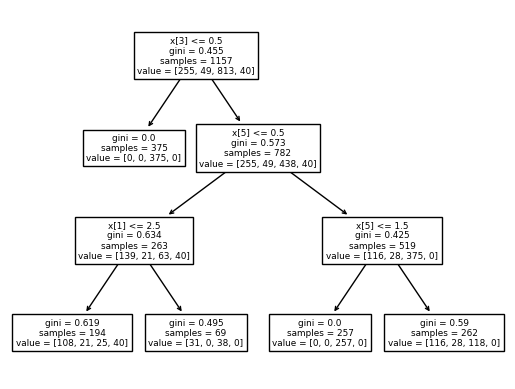

In [23]:
tree.plot_tree(clf_gini.fit(x_train, y_train))

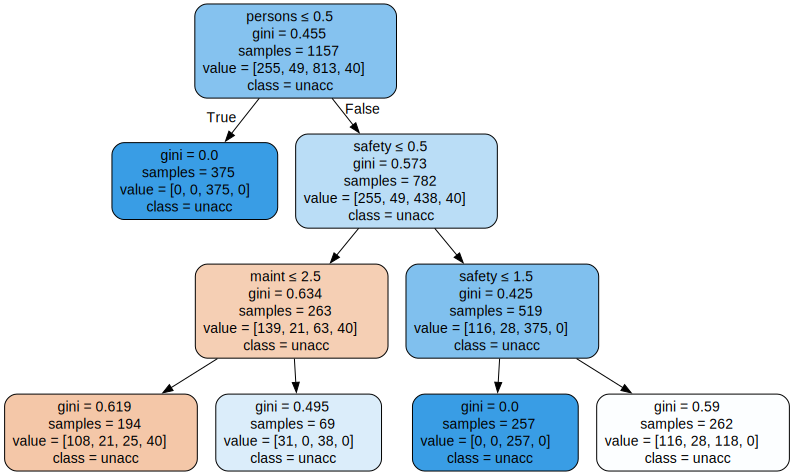

In [25]:
#y_train_strings = y_train.astype(str)
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=x_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

In [26]:
#entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [27]:
y_pred_en = clf_en.predict(x_test)

In [28]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7653


In [29]:
y_train

48      unacc
468     unacc
155     unacc
1721     good
1208    unacc
        ...  
1130    vgood
1294     good
860       acc
1459    unacc
1126      acc
Name: class, Length: 1157, dtype: object

In [30]:
y_pred_train_en = clf_en.predict(x_train)
y_pred_train_en

array(['unacc', 'unacc', 'acc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [31]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7744


In [32]:
print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.7744
Test set score: 0.7653


[Text(0.375, 0.875, 'x[3] <= 0.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\nentropy = 1.465\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(0.25, 0.375, 'x[1] <= 2.5\nentropy = 1.684\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(0.125, 0.125, 'entropy = 1.668\nsamples = 194\nvalue = [108, 21, 25, 40]'),
 Text(0.375, 0.125, 'entropy = 0.993\nsamples = 69\nvalue = [31, 0, 38, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\nentropy = 1.049\nsamples = 519\nvalue = [116, 28, 375, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 257\nvalue = [0, 0, 257, 0]'),
 Text(0.875, 0.125, 'entropy = 1.383\nsamples = 262\nvalue = [116, 28, 118, 0]')]

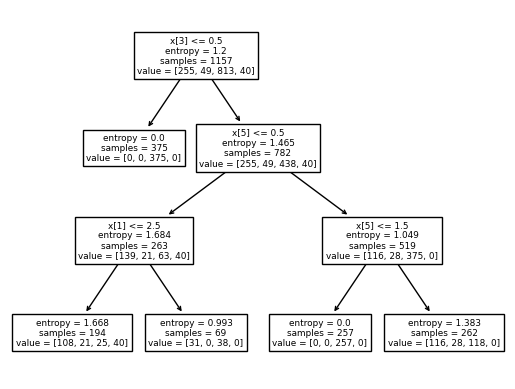

In [33]:
tree.plot_tree(clf_en.fit(x_train, y_train)) 

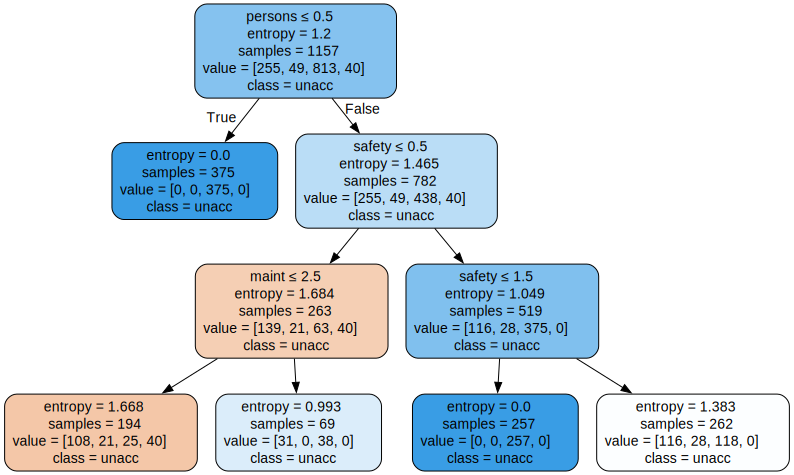

In [34]:
#y_train_strings = y_train.astype(str)
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=x_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

In [35]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 50   0  79   0]
 [  9   0  11   0]
 [ 10   0 387   0]
 [ 25   0   0   0]]


In [36]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.53      0.39      0.45       129
        good       0.00      0.00      0.00        20
       unacc       0.81      0.97      0.89       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.77       571
   macro avg       0.34      0.34      0.33       571
weighted avg       0.68      0.77      0.72       571



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_en, average='micro', zero_division=1)
recall = recall_score(y_test, y_pred_en, average='micro', zero_division=1)
f1 = f1_score(y_test, y_pred_en, average='micro', zero_division=1)

In [38]:
print('Precision:', precision)
print('recall:', recall)
print('f1:', f1)

Precision: 0.7653239929947461
recall: 0.7653239929947461
f1: 0.7653239929947461
